# **House Sales Project in Luanda, Angola.**

* **OBJECTIVES**:


    * Task 1: Importing Data

    * Task 2: Data Wrangling

    * Task 3: Exploratory Data Analysis

    * Task 4: Model Development 

    * Task 5: MOdel Evaluation and Refinement 

* **DATA SOURCE**:

    * The dataset is a simulation from a house sale in Angola. The dataset contains house sale prices for Luanda City, which includes Seattle. It includes homes sold between May 2013 and May 2014.

# Variables Traduction

| *Português*                | English |
|------------------------------|-------------|
| **Localização**              | Location |
| **Data que foi vendida**      | Date house was sold |
| **Preço em Kz**              | Price in AO (Angolan Kwanza) |
| **Número de Quartos**        | Number of bedrooms |
| **Número de WC**             | Number of bathrooms |
| **Metros quadrados da Casa**  | Square footage of the home |
| **Metros quadrados do Lote**  | Square footage of the lot |
| **Total de Pisos**           | Total floors (levels) in the house |
| **Beira-Mar**                | Indicates if the house has a waterfront view |
| **Se foi visitada ou não**   | Specifies whether the house has been viewed |
| **Em que condição se encontra** | Overall condition of the house |
| **Grau de avaliação**        | Overall grade assigned to the housing unit |
| **Ano de Construção**        | Year the house was built |
| **Ano de Manutenção**        | Year the house was renovated |
| **Sala de estar**            | Living room area in 2015 (implies some renovations) |


# Task 1: 

* Importing Required Libraries 

* Importing data

In [815]:
import pandas as pd
import matplotlib.pyplot as plt
# Use the inline backend to generate the plots within the browser
%matplotlib inline 
import numpy as np
import seaborn as srn
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Bruno Yonng Leopoldo

In [816]:
# Reading the dataset using the read_csv() method.
df_house = pd.read_csv('Angola_House.csv')
df_house = pd.DataFrame(df_house)
df_house.head(5)


,Unnamed: 0,Localização,data de Venda,Preço(Kz),Nº de Quartos,Nº de wc,Casa(m²),Lote(m²),Pisos,Beira-Mar,Se foi visitada,Condição,Avaliação da casa,Ano de construção,Ano de manutenção,Sala de estar(m²)
0,0,LUA_020,20141013T000000,22824634.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1955,0,1340
1,1,LUA_002,20141209T000000,55338680.0,3.0,2.25,2570,7242,2.0,0,0,3,7,1951,1991,1690
2,2,LUA_017,20150225T000000,18514800.0,2.0,1.00,770,10000,1.0,0,0,3,6,1933,0,2720
3,3,LUA_005,20141209T000000,62127440.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1965,0,1360
4,4,LUA_002,20150218T000000,52458600.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1987,0,1800


* **Display the data types of each column using the function dtypes**

In [817]:
df_house.dtypes

Unnamed: 0             int64
Localização           object
data de Venda         object
Preço(Kz)            float64
Nº de Quartos        float64
Nº de wc             float64
Casa(m²)               int64
Lote(m²)               int64
Pisos                float64
Beira-Mar              int64
Se foi visitada        int64
Condição               int64
Avaliação da casa      int64
Ano de construção      int64
Ano de manutenção      int64
Sala de estar(m²)      int64
dtype: object

We use the method describe to obtain a statistical summary of the dataframe.

In [818]:
df_house.describe()

,Unnamed: 0,Preço(Kz),Nº de Quartos,Nº de wc,Casa(m²),Lote(m²),Pisos,Beira-Mar,Se foi visitada,Condição,Avaliação da casa,Ano de construção,Ano de manutenção,Sala de estar(m²)
count,21613.00000,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,5.555347e+07,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1971.005136,84.402258,1986.552492
std,6239.28002,3.776270e+07,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,29.373411,401.679240,685.391304
min,0.00000,7.714500e+06,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,1900.000000,0.000000,399.000000
25%,5403.00000,3.311578e+07,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1951.000000,0.000000,1490.000000
50%,10806.00000,4.628700e+07,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1975.000000,0.000000,1840.000000
75%,16209.00000,6.634470e+07,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,1997.000000,0.000000,2360.000000
max,21612.00000,7.920220e+08,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,2015.000000,2015.000000,6210.000000


In [819]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         21613 non-null  int64  
 1   Localização        21613 non-null  object 
 2   data de Venda      21613 non-null  object 
 3   Preço(Kz)          21613 non-null  float64
 4   Nº de Quartos      21600 non-null  float64
 5   Nº de wc           21603 non-null  float64
 6   Casa(m²)           21613 non-null  int64  
 7   Lote(m²)           21613 non-null  int64  
 8   Pisos              21613 non-null  float64
 9   Beira-Mar          21613 non-null  int64  
 10  Se foi visitada    21613 non-null  int64  
 11  Condição           21613 non-null  int64  
 12  Avaliação da casa  21613 non-null  int64  
 13  Ano de construção  21613 non-null  int64  
 14  Ano de manutenção  21613 non-null  int64  
 15  Sala de estar(m²)  21613 non-null  int64  
dtypes: float64(4), int64(1

# Task 2: 

* Data Wrangling

    * Remove the columns that we will not use in the model

    * Convert variables 

    * Identify and dealing with missing values

    * Identify duplicate values

In [820]:
# Remove the first column
df_house = df_house.drop(['Unnamed: 0'], axis=1)
df_house.head(5)

,Localização,data de Venda,Preço(Kz),Nº de Quartos,Nº de wc,Casa(m²),Lote(m²),Pisos,Beira-Mar,Se foi visitada,Condição,Avaliação da casa,Ano de construção,Ano de manutenção,Sala de estar(m²)
0,LUA_020,20141013T000000,22824634.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1955,0,1340
1,LUA_002,20141209T000000,55338680.0,3.0,2.25,2570,7242,2.0,0,0,3,7,1951,1991,1690
2,LUA_017,20150225T000000,18514800.0,2.0,1.00,770,10000,1.0,0,0,3,6,1933,0,2720
3,LUA_005,20141209T000000,62127440.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1965,0,1360
4,LUA_002,20150218T000000,52458600.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1987,0,1800


* We can see we have missing values for the columns <code> Nº de Quartos</code>  and <code> Nº de wc</code>

In [821]:
print("number of NaN values for the column 'Nº de Quartos':", df_house['Nº de Quartos'].isnull().sum())
print("number of NaN values for the column 'Nº de wc':", df_house['Nº de wc'].isnull().sum())

number of NaN values for the column 'Nº de Quartos': 13
number of NaN values for the column 'Nº de wc': 10


In [822]:
missing_data = df_house.isnull().sum()
missing_data

Localização           0
data de Venda         0
Preço(Kz)             0
Nº de Quartos        13
Nº de wc             10
Casa(m²)              0
Lote(m²)              0
Pisos                 0
Beira-Mar             0
Se foi visitada       0
Condição              0
Avaliação da casa     0
Ano de construção     0
Ano de manutenção     0
Sala de estar(m²)     0
dtype: int64

* We can replace the missing values of the column <code>'Nº de Quartos'</code> with the most frequency number of the column  <code>'Nº de Quartos' </code> using the method <code>replace()</code>. Don't forget to set the <code>inplace</code> parameter to <code>True</code>


* We also replace the missing values of the column <code>'Nº de wc'</code> with the most frequency number of the column  <code>'Nº de wc' </code> using the method <code>replace()</code>. Don't forget to set the <code> inplace </code>  parameter top <code> True </code>

In [823]:
df_house.isnull().sum()

Localização           0
data de Venda         0
Preço(Kz)             0
Nº de Quartos        13
Nº de wc             10
Casa(m²)              0
Lote(m²)              0
Pisos                 0
Beira-Mar             0
Se foi visitada       0
Condição              0
Avaliação da casa     0
Ano de construção     0
Ano de manutenção     0
Sala de estar(m²)     0
dtype: int64

In [824]:
desc = pd.DataFrame(index = list(df_house))
desc['type'] = df_house.dtypes                                                 # This column stores the data type of each column.
desc['count'] = df_house.count()                                               # This column stores the number of non-null values in each column.
desc['nunique'] = df_house.nunique()                                           # This column stores the number of unique values in each column.
desc['%unique'] = desc['nunique'] /len(df_house) * 100                          # This column stores the percentage of unique values in each column.
desc['null'] = df_house.isnull().sum()                                         # This column stores the number of null values in each column.
desc['%null'] = desc['null'] / len(df_house) * 100                             # This column stores the percentage of null values in each column.
desc = pd.concat([desc,df_house.describe().T.drop('count',axis=1)],axis=1)     # This line concatenates the 'desc' DataFrame with the descriptive statistics of the 'df_house' DataFrame.
desc.sort_values(by=['type','null']).style.background_gradient(cmap='YlOrBr')\
    .bar(subset=['mean'],color='green')\
    .bar(subset=['max'],color='red')\
    .bar(subset=['min'], color='pink')\
    .bar(subset=['std'],color='lightblue')

,type,count,nunique,%unique,null,%null,mean,std,min,25%,50%,75%,max
Casa(m²),int64,21613,1038,4.802665,0,0.000000,2079.899736,918.440897,290.000000,1427.000000,1910.000000,2550.000000,13540.000000
Lote(m²),int64,21613,9782,45.259797,0,0.000000,15106.967566,41420.511515,520.000000,5040.000000,7618.000000,10688.000000,1651359.000000
Beira-Mar,int64,21613,2,0.009254,0,0.000000,0.007542,0.086517,0.000000,0.000000,0.000000,0.000000,1.000000
Se foi visitada,int64,21613,5,0.023134,0,0.000000,0.234303,0.766318,0.000000,0.000000,0.000000,0.000000,4.000000
Condição,int64,21613,5,0.023134,0,0.000000,3.409430,0.650743,1.000000,3.000000,3.000000,4.000000,5.000000
Avaliação da casa,int64,21613,12,0.055522,0,0.000000,7.656873,1.175459,1.000000,7.000000,7.000000,8.000000,13.000000
Ano de construção,int64,21613,116,0.536714,0,0.000000,1971.005136,29.373411,1900.000000,1951.000000,1975.000000,1997.000000,2015.000000
Ano de manutenção,int64,21613,70,0.323879,0,0.000000,84.402258,401.679240,0.000000,0.000000,0.000000,0.000000,2015.000000
Sala de estar(m²),int64,21613,777,3.595059,0,0.000000,1986.552492,685.391304,399.000000,1490.000000,1840.000000,2360.000000,6210.000000
Preço(Kz),float64,21613,4028,18.636931,0,0.000000,55553466.262105,37762703.430211,7714500.000000,33115777.000000,46287000.000000,66344700.000000,792022000.000000


* We can replace the missing values and organize the disorder of the column <code>'Nº de Quartos' , 'Se foi visitada', 'Condição', 'Nº de wc', 'Avaliação da casa' </code> with the most frequency number of the column using the method <code>replace()</code>.


In [825]:
df_house.dropna(inplace=True)

### 1º

In [826]:
df_house['Nº de Quartos'].fillna(df_house['Nº de Quartos'].mode())
df_house['Nº de Quartos'].astype(int)
df_house['Nº de Quartos'].value_counts()

Nº de Quartos
3.0     9824
4.0     6882
2.0     2760
5.0     1601
6.0      272
1.0      196
7.0       38
8.0       13
9.0        6
10.0       3
11.0       1
33.0       1
Name: count, dtype: int64

In [827]:
agrupado1 = df_house.groupby(['Nº de Quartos'])['Preço(Kz)'].sum()
agrupado1

Nº de Quartos
1.0     6.415577e+09
2.0     1.139471e+11
3.0     4.711259e+11
4.0     4.498024e+11
5.0     1.295364e+11
6.0     2.309635e+10
7.0     3.717876e+09
8.0     1.477687e+09
9.0     5.517409e+08
10.0    2.528299e+08
11.0    5.348720e+07
33.0    6.583040e+07
Name: Preço(Kz), dtype: float64

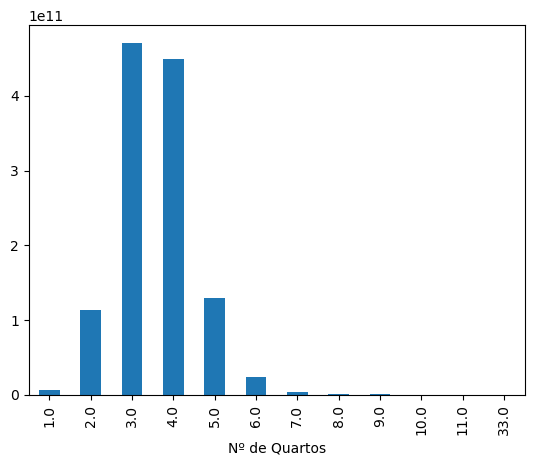

In [828]:
agrupado1.plot.bar()
plt.show()

In [829]:
df_house.loc[df_house["Nº de Quartos"] == 3.37287, "Nº de Quartos"] = 1
df_house.loc[df_house["Nº de Quartos"] == 7, "Nº de Quartos"] = 1
df_house.loc[df_house["Nº de Quartos"] == 8, "Nº de Quartos"] = 1
df_house.loc[df_house["Nº de Quartos"] == 9, "Nº de Quartos"] = 1
df_house.loc[df_house["Nº de Quartos"] == 10, "Nº de Quartos"] = 1
df_house.loc[df_house["Nº de Quartos"] == 11, "Nº de Quartos"] = 1
df_house.loc[df_house["Nº de Quartos"] == 33, "Nº de Quartos"] = 1
print(df_house["Nº de Quartos"].value_counts())

Nº de Quartos
3.0    9824
4.0    6882
2.0    2760
5.0    1601
6.0     272
1.0     258
Name: count, dtype: int64


### 2º

In [830]:
df_house['Nº de wc'].fillna(df_house['Nº de wc'].mode())
df_house['Nº de wc'].astype(int)
df_house['Nº de wc'].value_counts()

Nº de wc
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: count, dtype: int64

In [831]:
agrupado2 = df_house.groupby(['Nº de wc'])['Preço(Kz)'].sum()
agrupado2

Nº de wc
0.50    9.766557e+07
0.75    2.153940e+09
1.00    1.374801e+11
1.25    5.750851e+08
1.50    6.085114e+10
1.75    1.426178e+11
2.00    9.090018e+10
2.25    1.123680e+11
2.50    3.062604e+11
2.75    8.047488e+10
3.00    5.486930e+10
3.25    5.878759e+10
3.50    7.007267e+10
3.75    1.908759e+10
4.00    1.773393e+10
4.25    1.239835e+10
4.50    1.371762e+10
4.75    4.781960e+09
5.00    3.614843e+09
5.25    2.429893e+09
5.50    2.594438e+09
5.75    1.025514e+09
6.00    1.818668e+09
6.25    6.364977e+08
6.50    3.516670e+08
6.75    5.624385e+08
7.50    4.628700e+07
7.75    7.081911e+08
8.00    1.026543e+09
Name: Preço(Kz), dtype: float64

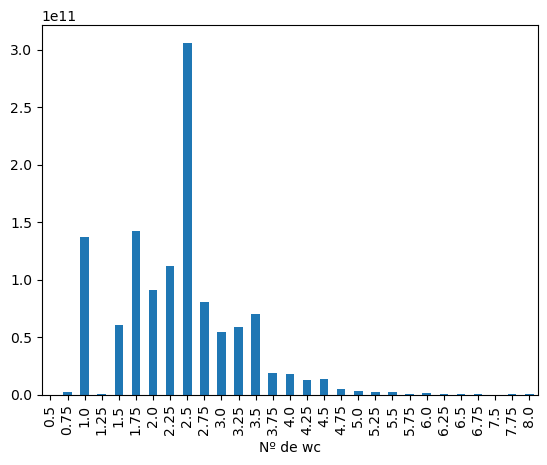

In [832]:
agrupado2.plot.bar()
plt.show()

In [833]:
def categorize_wc(wc):
    if wc > 0 and wc <= 1:
        return 1
    elif wc > 1 and wc <= 2:
        return 2
    elif wc > 2 and wc <= 3:
        return 3
    elif wc > 3 and wc <= 4:
        return 4
    elif wc > 4 and wc <= 5:
        return 5
    elif wc > 5 and wc <= 8:
        return 6
    else:
        return wc

df_house['Nº de wc'] = df_house['Nº de wc'].apply(categorize_wc)

print(df_house["Nº de Quartos"].value_counts())


Nº de Quartos
3.0    9824
4.0    6882
2.0    2760
5.0    1601
6.0     272
1.0     258
Name: count, dtype: int64


### 3º

In [834]:
df_house['Se foi visitada'].value_counts()

Se foi visitada
0    19475
2      961
3      510
1      332
4      319
Name: count, dtype: int64

In [835]:
agrupado3 = df_house.groupby(['Se foi visitada'])['Preço(Kz)'].sum()
agrupado3

Se foi visitada
0    9.949496e+11
1    2.773900e+10
2    7.833890e+10
3    5.098794e+10
4    4.802779e+10
Name: Preço(Kz), dtype: float64

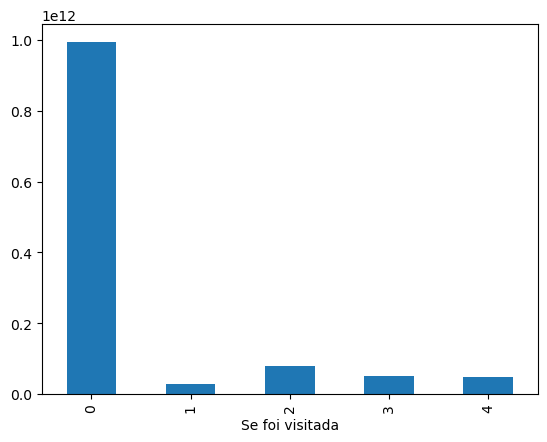

In [836]:
agrupado3.plot.bar()
plt.show()

In [837]:
df_house.loc[df_house["Se foi visitada"] == 2, "Se foi visitada"] = 1
df_house.loc[df_house["Se foi visitada"] == 3, "Se foi visitada"] = 1
df_house.loc[df_house["Se foi visitada"] == 4, "Se foi visitada"] = 1
df_house.loc[df_house["Se foi visitada"] == 5, "Se foi visitada"] = 1
print(df_house["Se foi visitada"].value_counts())


Se foi visitada
0    19475
1     2122
Name: count, dtype: int64


### 4º

In [838]:
df_house['Condição'].value_counts()

Condição
3    14020
4     5677
5     1701
2      170
1       29
Name: count, dtype: int64

In [839]:
agrupado4 = df_house.groupby(['Condição'])['Preço(Kz)'].sum()
agrupado4

Condição
1    1.017383e+09
2    5.738085e+09
3    7.817452e+11
4    3.043908e+11
5    1.071516e+11
Name: Preço(Kz), dtype: float64

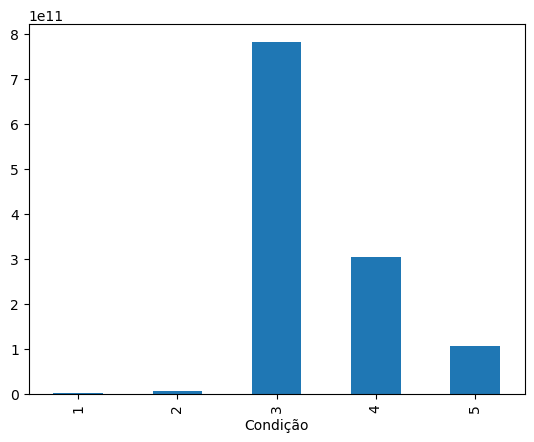

In [840]:
agrupado4.plot.bar()
plt.show()

In [841]:
df_house.loc[df_house["Condição"] == 1, "Condição"] = 1

In [842]:
df_house.loc[df_house["Condição"] == 3, "Condição"] = 1
df_house.loc[df_house["Condição"] == 2, "Condição"] = 2
df_house.loc[df_house["Condição"] == 4, "Condição"] = 2
df_house.loc[df_house["Condição"] == 5, "Condição"] = 2
print(df_house["Condição"].value_counts())

Condição
1    14049
2     7548
Name: count, dtype: int64


### 5º

In [843]:
df_house['Avaliação da casa'].value_counts()

Avaliação da casa
7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: count, dtype: int64

In [844]:
agrupado5= df_house.groupby(['Avaliação da casa'])['Preço(Kz)'].sum()
agrupado5

Avaliação da casa
3     2.694932e+07
4     5.887758e+08
5     6.186289e+09
6     6.329102e+10
7     3.716189e+11
8     3.387134e+11
9     2.080587e+11
10    1.250149e+11
11    6.143209e+10
12    2.015175e+10
13    4.960424e+09
Name: Preço(Kz), dtype: float64

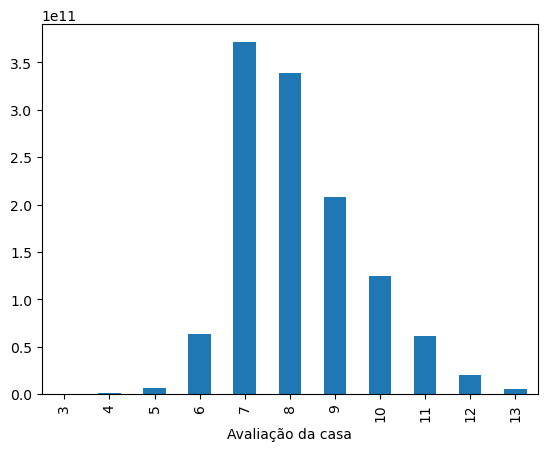

In [845]:
agrupado5.plot.bar()
plt.show()

In [846]:
df_house.loc[df_house["Avaliação da casa"] == 5, "Avaliação da casa"] = 1
df_house.loc[df_house["Avaliação da casa"] == 11, "Avaliação da casa"] = 1
df_house.loc[df_house["Avaliação da casa"] == 12, "Avaliação da casa"] = 1
df_house.loc[df_house["Avaliação da casa"] == 13, "Avaliação da casa"] = 1
df_house.loc[df_house["Avaliação da casa"] == 7, "Avaliação da casa"] = 5
df_house.loc[df_house["Avaliação da casa"] == 8, "Avaliação da casa"] = 4
df_house.loc[df_house["Avaliação da casa"] == 9, "Avaliação da casa"] = 3
df_house.loc[df_house["Avaliação da casa"] == 10, "Avaliação da casa"] = 2
print(df_house["Avaliação da casa"].value_counts())

Avaliação da casa
5    8974
4    6092
3    2616
6    2038
2    1134
1     743
Name: count, dtype: int64


In [847]:
desc = pd.DataFrame(index = list(df_house))
desc['type'] = df_house.dtypes                                                 # This column stores the data type of each column.
desc['count'] = df_house.count()                                               # This column stores the number of non-null values in each column.
desc['nunique'] = df_house.nunique()                                           # This column stores the number of unique values in each column.
desc['%unique'] = desc['nunique'] /len(df_house) * 100                          # This column stores the percentage of unique values in each column.
desc['null'] = df_house.isnull().sum()                                         # This column stores the number of null values in each column.
desc['%null'] = desc['null'] / len(df_house) * 100                             # This column stores the percentage of null values in each column.
desc = pd.concat([desc,df_house.describe().T.drop('count',axis=1)],axis=1)     # This line concatenates the 'desc' DataFrame with the descriptive statistics of the 'df_house' DataFrame.
desc.sort_values(by=['type','null']).style.background_gradient(cmap='YlOrBr')\
    .bar(subset=['mean'],color='green')\
    .bar(subset=['max'],color='red')\
    .bar(subset=['min'], color='pink')\
    .bar(subset=['std'],color='lightblue')

,type,count,nunique,%unique,null,%null,mean,std,min,25%,50%,75%,max
Nº de wc,int64,21597,6,0.027782,0,0.000000,2.439830,0.919250,1.000000,2.000000,3.000000,3.000000,6.000000
Casa(m²),int64,21597,1034,4.787702,0,0.000000,2080.321850,918.106125,370.000000,1430.000000,1910.000000,2550.000000,13540.000000
Lote(m²),int64,21597,9776,45.265546,0,0.000000,15099.408760,41412.636876,520.000000,5040.000000,7618.000000,10685.000000,1651359.000000
Beira-Mar,int64,21597,2,0.009261,0,0.000000,0.007547,0.086549,0.000000,0.000000,0.000000,0.000000,1.000000
Se foi visitada,int64,21597,2,0.009261,0,0.000000,0.098254,0.297665,0.000000,0.000000,0.000000,0.000000,1.000000
Condição,int64,21597,2,0.009261,0,0.000000,1.349493,0.476821,1.000000,1.000000,1.000000,2.000000,2.000000
Avaliação da casa,int64,21597,6,0.027782,0,0.000000,4.274899,1.165443,1.000000,4.000000,5.000000,5.000000,6.000000
Ano de construção,int64,21597,116,0.537112,0,0.000000,1970.999676,29.375234,1900.000000,1951.000000,1975.000000,1997.000000,2015.000000
Ano de manutenção,int64,21597,70,0.324119,0,0.000000,84.464787,401.821438,0.000000,0.000000,0.000000,0.000000,2015.000000
Sala de estar(m²),int64,21597,777,3.597722,0,0.000000,1986.620318,685.230472,399.000000,1490.000000,1840.000000,2360.000000,6210.000000


* **Pearson Correlation**

In [848]:
pearson_coef, p_value = stats.pearsonr(df_house['Ano de manutenção'], df_house['Preço(Kz)'])
print('Pearson Correlation Coefficient:', pearson_coef)
print('P-value:', p_value)


pearson_coef, p_value = stats.pearsonr(df_house['Condição'], df_house['Preço(Kz)'])
print('Pearson Correlation Coefficient:', pearson_coef)
print('P-value:', p_value)


pearson_coef, p_value = stats.pearsonr(df_house['Sala de estar(m²)'], df_house['Preço(Kz)'])
print('Pearson Correlation Coefficient:', pearson_coef)
print('P-value:', p_value)


pearson_coef, p_value = stats.pearsonr(df_house['Nº de Quartos'], df_house['Preço(Kz)'])
print('Pearson Correlation Coefficient:', pearson_coef)
print('P-value:', p_value)

Pearson Correlation Coefficient: 0.12641471837369
P-value: 1.2256630839499248e-77
Pearson Correlation Coefficient: -0.005467488682290293
P-value: 0.4217105595563755
Pearson Correlation Coefficient: 0.5852472285853739
P-value: 0.0
Pearson Correlation Coefficient: 0.29931109336759276
P-value: 0.0


**Side Note**: 

* We can see that in the columns 'Ano de manutenção' and 'Condição' the coeficient correlation is lower more next to the 0 value. This means that the correlation between these columns and the price is very low. But the p-value is less than 0.001, which means that the correlation is statistically significant. 

    * In this case, we can say that the correlation is significant but weak.


* In other hands we have the columns 'Sala de estar(m²)' and 'Nº de Quartos '. The correlation is high comparedly with two first columns and the p-value is lower than 0.0001 but not like the two first variables, which means that the correlation still being significant statistically.  

    * In this case, we can say that the correlation is significant and moderately strong.


``Significant statistically means that the correlation is not by chance.``

# Task 3:

* Exploratory Data Analysis

In [849]:
# Select only numeric column for correlation 
numeric_df = df_house.select_dtypes(include=['int64', 'float64'])
numeric_df

,Preço(Kz),Nº de Quartos,Nº de wc,Casa(m²),Lote(m²),Pisos,Beira-Mar,Se foi visitada,Condição,Avaliação da casa,Ano de construção,Ano de manutenção,Sala de estar(m²)
0,22824634.00,3.0,1,1180,5650,1.0,0,0,1,5,1955,0,1340
1,55338680.00,3.0,3,2570,7242,2.0,0,0,1,5,1951,1991,1690
2,18514800.00,2.0,1,770,10000,1.0,0,0,1,6,1933,0,2720
3,62127440.00,4.0,3,1960,5000,1.0,0,0,2,5,1965,0,1360
4,52458600.00,3.0,2,1680,8080,1.0,0,0,1,4,1987,0,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,37029600.00,3.0,3,1530,1131,3.0,0,0,1,4,2009,0,1530
21609,41144000.00,4.0,3,2310,5813,2.0,0,0,1,4,2014,0,1830
21610,41360108.86,2.0,1,1020,1350,2.0,0,0,1,5,2009,0,1020
21611,41144000.00,3.0,3,1600,2388,2.0,0,0,1,4,2004,0,1410


In [850]:
# Correlation between selected columns above.
correlation = numeric_df.corr()
correlation

,Preço(Kz),Nº de Quartos,Nº de wc,Casa(m²),Lote(m²),Pisos,Beira-Mar,Se foi visitada,Condição,Avaliação da casa,Ano de construção,Ano de manutenção,Sala de estar(m²)
Preço(Kz),1.000000,0.299311,0.488378,0.701909,0.089882,0.256814,0.266437,0.359141,-0.005467,-0.597601,0.053984,0.126415,0.585247
Nº de Quartos,0.299311,1.000000,0.480314,0.566184,0.034411,0.177304,-0.005176,0.079975,-0.004018,-0.290563,0.175262,0.013123,0.405945
Nº de wc,0.488378,0.480314,1.000000,0.724730,0.078661,0.530769,0.057798,0.162402,-0.194576,-0.571662,0.543238,0.028500,0.565166
Casa(m²),0.701909,0.566184,0.724730,1.000000,0.173453,0.353953,0.103854,0.271016,-0.099598,-0.672809,0.318152,0.055308,0.756402
Lote(m²),0.089882,0.034411,0.078661,0.173453,1.000000,-0.004814,0.021632,0.068069,0.011118,-0.124244,0.052946,0.007686,0.144763
Pisos,0.256814,0.177304,0.530769,0.353953,-0.004814,1.000000,0.023755,0.017014,-0.316237,-0.410576,0.489193,0.006427,0.280102
Beira-Mar,0.266437,-0.005176,0.057798,0.103854,0.021632,0.023755,1.000000,0.264185,0.015745,-0.084380,-0.026153,0.092873,0.086507
Se foi visitada,0.359141,0.079975,0.162402,0.271016,0.068069,0.017014,0.264185,1.000000,0.037967,-0.223886,-0.063083,0.095088,0.273736
Condição,-0.005467,-0.004018,-0.194576,-0.099598,0.011118,-0.316237,0.015745,0.037967,1.000000,0.166074,-0.387877,-0.069257,-0.113042
Avaliação da casa,-0.597601,-0.290563,-0.571662,-0.672809,-0.124244,-0.410576,-0.084380,-0.223886,0.166074,1.000000,-0.372776,-0.008325,-0.651032


**Nota**:

``Value-counts`` is a good way of understanding how many units of each characteristic/variable we have.
The method value-counts only works on pandas series, not dataframes.

In [851]:
# Value counts on the all column 'Pisos'
# Convert the series to a dataframe
Pisos_counts = df_house['Pisos'].value_counts().to_frame()
Pisos_counts.reset_index()

,Pisos,count
0,1.0,10673
1,2.0,8235
2,1.5,1910
3,3.0,611
4,2.5,161
5,3.5,7


The function <code>boxplot</code> determine whether houses with a waterfront view or without a waterfront view have more price outliers.

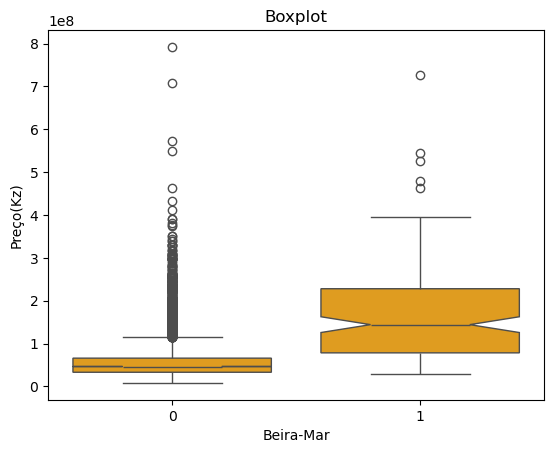

In [852]:
# Boxplot for 'waterfront' and 'price' columns. 
df_house['Beira-Mar'].unique()

srn.boxplot(x='Beira-Mar',
            y='Preço(Kz)', 
            data=df_house, 
            orient='v', 
            color='orange',
            notch=True).set_title('Boxplot')

plt.show()

**Side Note**: Notice that the prices of house with waterfront have higher outliers than the without waterfront houses. 

* The function <code>regplot</code>  in the seaborn library  determine if the feature <code>sqft_above</code> is negatively or positively correlated with price.

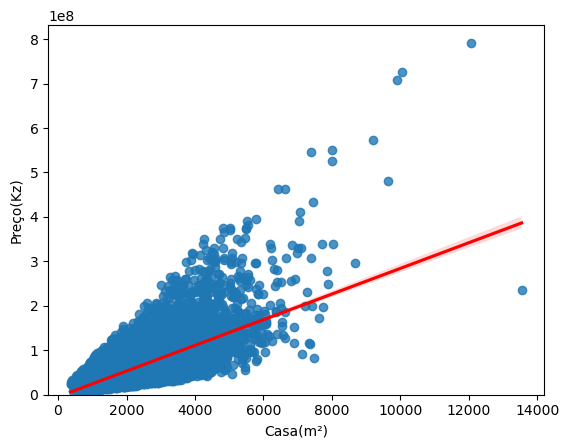

In [853]:
# Regplot for 'House Square' and 'price' columns. 
srn.regplot(x='Casa(m²)', y='Preço(Kz)', data=df_house, line_kws={'color': 'red'})
plt.ylim(0,)
plt.show()

**Side Note**: The correlation is positive; as the number of badrooms increases, the square of the house increases, and probably the price increases too. 

**Using the Pandas method ``corr()`` to find the most correlated feature with price.**

In [854]:
numeric_df.corr()['Preço(Kz)'].sort_values()

Avaliação da casa   -0.597601
Condição            -0.005467
Ano de construção    0.053984
Lote(m²)             0.089882
Ano de manutenção    0.126415
Pisos                0.256814
Beira-Mar            0.266437
Nº de Quartos        0.299311
Se foi visitada      0.359141
Nº de wc             0.488378
Sala de estar(m²)    0.585247
Casa(m²)             0.701909
Preço(Kz)            1.000000
Name: Preço(Kz), dtype: float64

# Task 4: Model Development

* Simple Linear Regression 

* Multiple Linear Regression 

* Polynomial Regression 

* Ridge Regression

In [855]:
lm = LinearRegression()
lm

LinearRegression()

* **Simple Linear Regression**

We can Fit a linear regression model using the house condition feature <code>'condição'</code>, caculate the ``R^2`` and ``predict the price``.

In [856]:
X1 = df_house[['Condição']]
Y = df_house['Preço(Kz)']

In [857]:
lr1 = lm.fit(X1,Y)
lr1 

LinearRegression()

In [858]:
# Produce a prediction 
Yhat_lr1 = lr1.predict(X1)
Yhat_lr1[0:5]

array([55716608.19882125, 55716608.19882125, 55716608.19882125,
       55283592.71921568, 55716608.19882125])

In [859]:
# Final Estimaded Linear for the model above
price_lr1 = lr1.intercept_ + lr1.coef_ * df_house['Condição']
price_lr1[0:5]

0    5.571661e+07
1    5.571661e+07
2    5.571661e+07
3    5.528359e+07
4    5.571661e+07
Name: Condição, dtype: float64

In [860]:
# Calculate de R^2
R_squared_lr1 = r2_score(Y, lr1.predict(X1))
print('R_squared is:', R_squared_lr1)

R_squared is: 2.9893432490935012e-05


We can use the same step above to Fit a linear regression model to predict the <code>'price'</code> using the feature <code>'Lote(m²)'</code> then calculate the R^2.

In [861]:
X2 = df_house[['Casa(m²)']]
Y = df_house['Preço(Kz)']

In [862]:
# Fit the model with new feature
lr2 = lm.fit(X2, Y)
lr2

LinearRegression()

In [863]:
# Produce a prediction 
Yhat_lr2 = lr2.predict(X2)
Yhat_lr2[0:5]

array([29572255.07209304, 69702675.06907117, 17735224.71327215,
       52091483.55960595, 44007657.94870388])

In [864]:
# Final Estimaded Linear for the second model (lr2)
price_lr2 = lr2.intercept_ + lr2.coef_ * df_house['Casa(m²)']
price_lr2[0:5]

0    2.957226e+07
1    6.970268e+07
2    1.773522e+07
3    5.209148e+07
4    4.400766e+07
Name: Casa(m²), dtype: float64

In [865]:
# Calculate de R^2
R_squared_lr2 = lr2.score(X2, Y)
print('R_squared is:', R_squared_lr2 )

R_squared is: 0.49267663172823795


**Conclusion:**

* The R^2 value is higher than the R^2 value of the house condition model. It is mean that the square footage of the house is a better predictor of price than the house condition.

* **Multiple Linear Regression**:

We can fit a linear regression model to predict the <code>'price'</code> using the list of following features:

* <code>'Nº de Quartos'</code>, <code>'Nº de wc'</code>, <code>'Metros quadrados da Casa'</code>, <code>'Total de Pisos'</code>, <code>'Beira-Mar'</code>, <code>'condição'</code>, <code>'Grau de avaliação'</code>, <code>'Ano de Construção'</code>, <code>'Ano de manutenção'</code>, <code>'Sala de estar'</code>

In [866]:
Z1 = df_house[['Casa(m²)', 'Pisos', 'Nº Quartos', 'Nº wc', 'Beira-Mar', 'Se foi visitada', 'Sala de estar(m²)', 'Avaliação da casa', 'Ano de manutenção']]
Y = df_house['Preço(Kz)']

KeyError: "['Nº Quartos', 'Nº wc'] not in index"

In [ ]:
lr3 = lm.fit(Z1, Y)
lr3 

LinearRegression()

In [ ]:
Yhat_lr3 = lr3.predict(Z1)
Yhat_lr3[0:5]

array([31743255.97223179, 66497197.29890347, 18067317.20319921,
       47730213.22185096, 54060348.33011773])

In [ ]:
R_squared_lr3 = lr3.score(Z1 , Y)
print('R_squared is:', R_squared_lr3)

R_squared is: 0.603378801553957


**Conclusion:**

* You can observe that the R^2 value is higher than the R^2 value of the simple linear regression model. It is mean that the multiple linear regression model is a better predictor of price than the simple linear regression model. 

* **Polynomial Regression**:

Now we will create a pipeline object to predict the 'price', fit the object using the features in the list <code>features</code>, and calculate the R^2. 

And to do this we will use polynomial Features function object to transform the features into a polynomial feature with a degree of 2.

In [ ]:
# Create a polynomial feature obbject of degree 2
pr = PolynomialFeatures(degree=2)
print(pr)


PolynomialFeatures()


In [ ]:
Z1.isnull().sum()

Casa(m²)             0
Pisos                0
Nº Quartos           0
Nº wc                0
Beira-Mar            0
Se foi visitada      0
Sala de estar(m²)    0
Avaliação da casa    0
Ano de manutenção    0
dtype: int64

In [ ]:
# Fit and transform the data into a polynomial 
Z1_pr = pr.fit_transform(Z1)
print(Z1.shape)
print(Z1_pr.shape)

(21613, 9)
(21613, 55)


* Create a pipeline, by creating a list of tuples include the name of model, and its corresponding constructor.

In [ ]:
input_ = [('Scale', StandardScaler()), ('Polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
input_

[('Scale', StandardScaler()),
 ('Polynomial', PolynomialFeatures(include_bias=False)),
 ('model', LinearRegression())]

Input the list as an argument to the pipeline constructor: 

In [ ]:
pipe_ = Pipeline(input_)
pipe_

Pipeline(steps=[('Scale', StandardScaler()),
                ('Polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

* **Normaziling the data because polynomial regression is sensitive to the scale of the features**.

In [ ]:
feature = Z1.astype(float)
pipe_.fit(feature, Y)

Pipeline(steps=[('Scale', StandardScaler()),
                ('Polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
Yhat_pipe = pipe_.predict(feature)
Yhat_pipe[0:5]

array([34843202.9356344 , 58530561.01508377, 46629860.89802188,
       42429823.27952839, 49384303.21234846])

In [ ]:
R_squared_pipe = r2_score(Y, pipe_.predict(feature))
print('R_squared:', R_squared_pipe)

R_squared: 0.6822626877336746


**Conclusion**:

* The R^2 value is higher than the R^2 value of the simple linear regression model and the multiple linear regression model. It is mean that the polynomial regression model is a better predictor of price than the simple linear regression and multiple linear regression models.

# Task 5: Model Evaluation and Refinement

In [ ]:
features =  ['Casa(m²)', 'Pisos', 'Nº Quartos', 'Nº wc', 'Beira-Mar', 'Se foi visitada', 'Sala de estar(m²)', 'Avaliação da casa', 'Ano de manutenção']
Z1 = df_house[features]
Y = df_house['Preço(Kz)']

* Now we wiil by the news variables to split the data into training and test subsets
* Assuming that 15% of the data will be reserved for testing and 75% for training.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(Z1, Y, test_size=0.15, random_state=1)

print('Number of training samples:', x_train.shape[0])
print('Number of test samples:', x_test.shape[0])

Number of training samples: 18371
Number of test samples: 3242


* Create a Ridge regression object.
* Using the training data, set the regularization parameter to 0.1.

* Why I'm using Ridge regression? 

    * Ridge regression is a type of linear regression that can be used when multicollinearity is present in the data. It is also a good way to prevent overfifitting, because it introduces a small amount of bias to the model.

``Bias`` means that the model is too simple, not complex enough to see the real patterns making the same kind of mistake over and over again.

``Variance`` means that the model is too complex and is picking up the noise in the training data.

In [ ]:
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)

Ridge(alpha=0.1)

In [ ]:
R_squared_Ridge = r2_score(y_test, RidgeModel.predict(x_test))
print('The R-squared value is:', R_squared_Ridge)

The R-squared value is: 0.6022731938237068


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

* Create a Polynomial features and Transform the training and test subsets data
* Perform a degree 2 Polynomial transformation on the data

In [ ]:
pr2 = PolynomialFeatures(degree=2)
x_train_pr2 = pr2.fit_transform(x_train)
x_test_pr2 = pr2.fit_transform(x_test)
pr2 

PolynomialFeatures()

In [ ]:
print(x_train_pr2.shape)
print(x_test_pr2.shape)

(18371, 55)
(3242, 55)


* **Fit the RidgeModel created above with the PolynomialFeatures (pr2)**

In [ ]:
RidgeModel.fit(x_train_pr2, y_train)

C:\Users\micro\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=9.25475e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.1)

We will use the method <code>predict</code> to predict the price of the training data and the test data.

In [ ]:
Yhat_Ridge_Polly = RidgeModel.predict(x_train_pr2)
Yhat_Ridge_Polly[0:5]

array([31996783.28386826, 50129705.94232528, 36563269.69997224,
       74863070.13510585, 51958884.51641068])

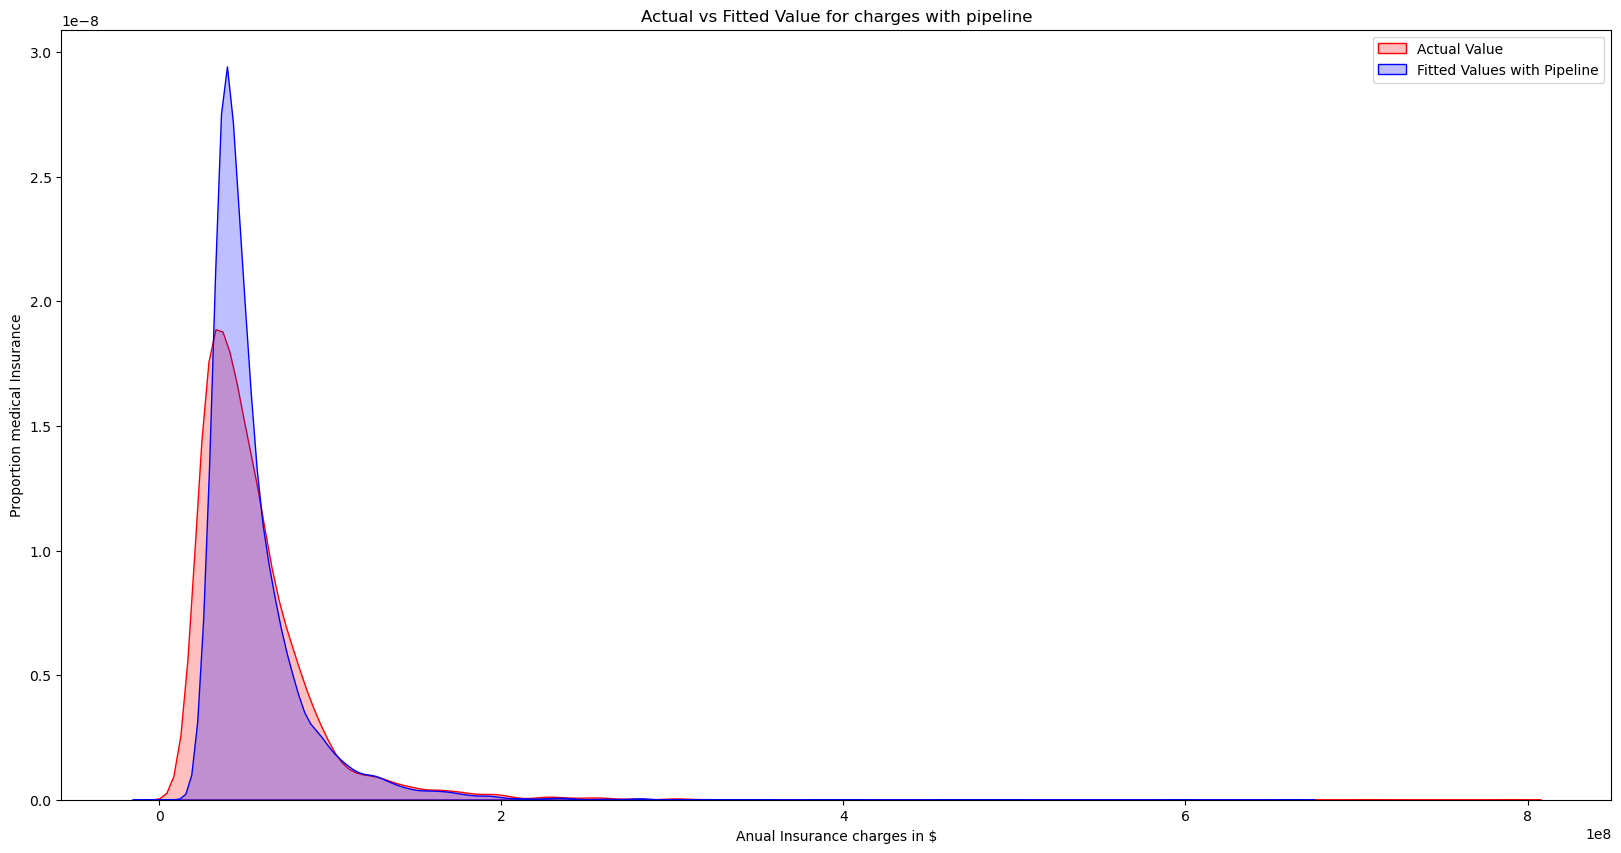

In [ ]:
plt.figure(figsize=(20, 10))

ax1 = srn.kdeplot(y_train, color='r', label='Actual Value', fill=True)
srn.kdeplot(Yhat_Ridge_Polly, color='b', label='Fitted Values with Pipeline', fill=True, ax=ax1)

plt.title('Actual vs Fitted Value for charges with pipeline')
plt.xlabel('Anual Insurance charges in $')
plt.ylabel('Proportion medical Insurance')

plt.legend()

plt.show()

In [ ]:
R_squared_Ridge_Polly = r2_score(y_train, Yhat_Ridge_Polly)
print('The R-Squared value is:', R_squared_Ridge_Polly)

The R-Squared value is: 0.6818995679894742


In [ ]:
Yhat_Ridge_Polly = RidgeModel.predict(x_test_pr2)
Yhat_Ridge_Polly[0:5]

array([68942909.66234046, 40033595.98005363, 79281813.18842822,
       61726309.77264148, 30152611.77192153])

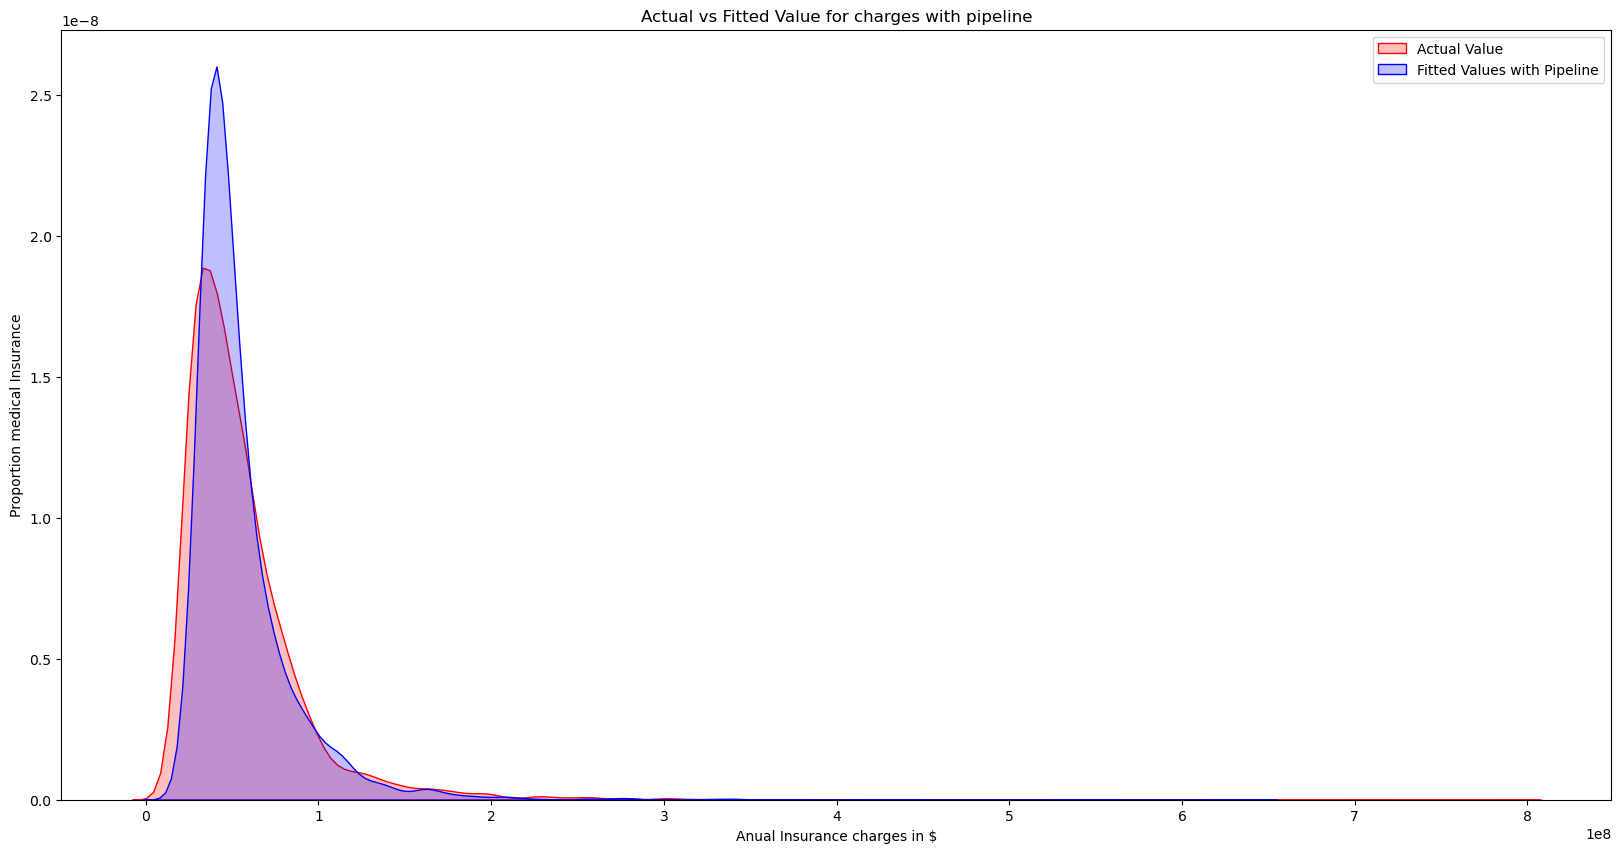

In [ ]:
plt.figure(figsize=(20, 10))

ax1 = srn.kdeplot(y_train, color='r', label='Actual Value', fill=True)
srn.kdeplot(Yhat_Ridge_Polly, color='b', label='Fitted Values with Pipeline',fill=True, ax=ax1)

plt.title('Actual vs Fitted Value for charges with pipeline')
plt.xlabel('Anual Insurance charges in $')
plt.ylabel('Proportion medical Insurance')

plt.legend()

plt.show()

In [ ]:
R_squared_Ridge_Polly = r2_score(y_test, Yhat_Ridge_Polly)
print('The R-Squared value is:', R_squared_Ridge_Polly)

The R-Squared value is: 0.6606016685583501


We can use the method ``cross_val_score`` to obtain the average R^2 score for the test data.

Cross_validation is a model validation technique for assessing how the results of a statistical analysis will generalize to an independent data set. 

In [ ]:
Rcross_Polly = cross_val_score(RidgeModel, x_train_pr2, y_train, cv = 3)
print('The mean of the folds are:', Rcross_Polly.mean())

The mean of the folds are: 0.6482463322062172


C:\Users\micro\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.46224e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\micro\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.29106e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\micro\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.42337e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


# Conclusion

In this project we have developed a model to predict the price of houses in Luanda, Angola. We have used different types of regression models to predict the price of the houses. We have also evaluated the models using the R^2 value and cross-validation. 

We conclude that the polynomial regression model is the best model to predict the price of the houses based on the features in the dataset. 

* However, we can improve the model by using more features or by using a different type of regression model.